In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler


In [2]:
run_id = 'lamda_gama_fix_gama'
metric = 'val_precision_score'
for file in os.listdir(f'results/{metric}/{run_id}/'):
    print(file.split('_'))
    print(file)
    break

FileNotFoundError: [Errno 2] No such file or directory: 'results/val_precision_score/lamda_gama_fix_gama/'

In [21]:
# run_id = 1
# metric = 'val_precision_score'
def get_metrics_table(metric=metric,run_id=run_id,lambda_game=False):
    dfs = []
    for file in os.listdir(f'results/{metric}/{run_id}/'):
        if 'metrics' in file:
            curr_df = pd.read_csv(f'results/{metric}/{run_id}/{file}')
            if lambda_game and len(file.split('_')) ==3:
                curr_df['gama'] = float(file.split('_')[2][:-4])
                curr_df['lamda'] = file.split('_')[1]
                
            elif lambda_game :
                print(file)
                curr_df['gama'] = float(1.0)
                curr_df['lamda'] = file.split('_')[1][:-4]
            else:
                curr_df['lamda'] = file.split('_')[1][:-4]
            dfs.append(curr_df)
    return pd.concat(dfs)

def get_predicts_table(metric=metric,run_id=run_id,scale=False):
    dfs = []
    for file in os.listdir(f'results/{metric}/{run_id}/'):
        if 'test_predict' in file:
            curr_df = pd.read_csv(f'results/{metric}/{run_id}/{file}')
            curr_df[file[:-4]] = curr_df.test_y_pred
            dfs.append(curr_df[file[:-4]])
    dfs.append(curr_df.test_y_true)
    dfs = pd.concat(dfs,axis=1)
    if scale:
        scaler = MinMaxScaler()
        scaler.fit(dfs)
        df_scale = scaler.transform(dfs)
        df_scale = pd.DataFrame(df_scale,columns = dfs.columns)
        return df_scale
    return dfs
    

In [5]:
rnid = 1
metric = 'val_loss'
# metric = 'val_loss'

results_df = get_metrics_table(metric,rnid)
results_df[results_df.phase=='test'].sort_values('_f1_score',ascending=False)

,_loss,_accuracy,_ones_ratio,_f1_score,_precision_score,_recall_score,_roc_auc_score,phase,_lamda,lamda
2,0.240659,0.904408,0.076275,0.508906,0.649351,0.418410,0.694036,test,0.12376,ce
2,0.091026,0.777613,0.300149,0.468639,0.326733,0.828452,0.799619,test,0.12376,wce
2,0.127508,0.895988,0.056959,0.406780,0.626087,0.301255,0.638549,test,0.45000,0.45
2,0.130102,0.897969,0.050025,0.394118,0.663366,0.280335,0.630617,test,0.36000,0.36
2,0.119901,0.900446,0.039624,0.369906,0.737500,0.246862,0.617532,test,0.55000,0.55
2,0.109831,0.899455,0.039624,0.363636,0.725000,0.242678,0.615159,test,0.64000,0.64
2,0.109521,0.885587,0.044577,0.297872,0.544444,0.205021,0.590994,test,0.09000,0.09
2,0.126703,0.888559,0.028727,0.242424,0.620690,0.150628,0.569134,test,0.18000,0.18
2,0.130174,0.888063,0.021298,0.198582,0.651163,0.117155,0.554364,test,0.27000,0.27
2,0.116833,0.884101,0.022288,0.176056,0.555556,0.104603,0.546683,test,0.12376,0.1237595955813518


<AxesSubplot:ylabel='lamda'>

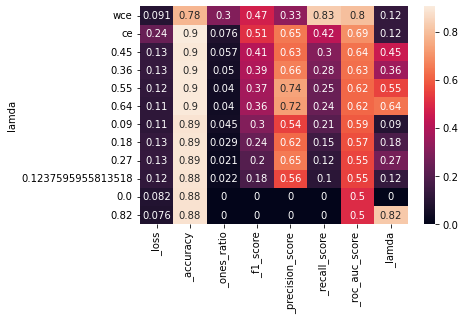

In [6]:
plot_df = results_df[results_df.phase=='test'].sort_values('_roc_auc_score',ascending=False).drop('phase',axis=1).set_index('lamda')
sns.heatmap(plot_df, annot=True)

metrics_ce.csv
metrics_wce.csv


<AxesSubplot:ylabel='lamda'>

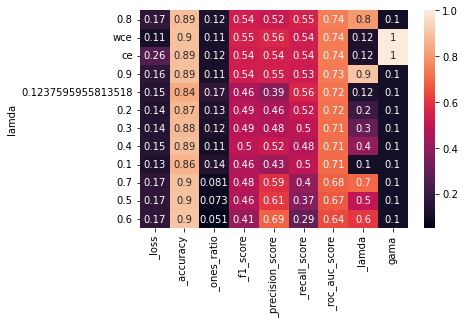

In [7]:
rnid = 'lamda_gama_fix_gama'
metric = 'val_f1_score'
# metric = 'val_loss'

results_df = get_metrics_table(metric,rnid,True)
results_df[results_df.phase=='test'].sort_values('_f1_score',ascending=False)
plot_df = results_df[results_df.phase=='test'].sort_values('_roc_auc_score',ascending=False).drop('phase',axis=1).set_index('lamda')

plot_df2 = plot_df.drop('gama',axis =1 )
plot_df2
sns.heatmap(plot_df, annot=True)

In [8]:
models_name = 'test_predict_0.37_0.9'
metric = 'val_roc_auc_score'

pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']].fillna(0)
pred_df

FileNotFoundError: [Errno 2] No such file or directory: 'results/val_roc_auc_score/lamda_gama_fix_gama/'

In [53]:

rnid = 'lamda_gama_fix_gama_04'
metric = 'val_f1_score'
exp_names = [f[:-4] for f in [os.listdir(f'results/{metric}/{rnid}/')][0] if 'test' in f]
exp_names = [f for f in exp_names if 'ce' not in f]
exp_names

['test_predict_0.1237595955813518_0.1',
 'test_predict_0.83_0.1',
 'test_predict_0.85_0.1',
 'test_predict_0.87_0.1',
 'test_predict_0.8_0.1',
 'test_predict_0.9_0.1']

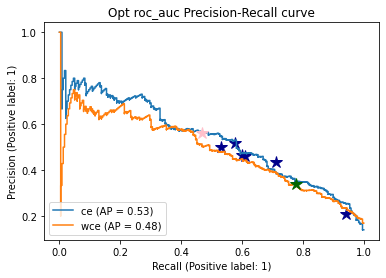

In [55]:

rnid = 'lamda_gama_fix_gama_04'
col = exp_names

for c in col:
       models_name = c
       metric = 'val_loss'

       pred_df = get_predicts_table(metric,rnid,scale=True)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']].fillna(0)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)

    #    display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name=c,ax = plt.gca())
    #    _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)

plt.show()

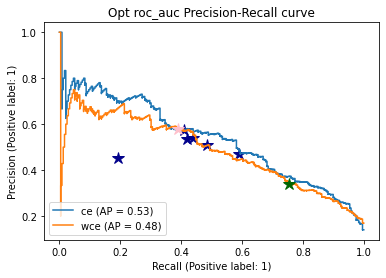

In [56]:

rnid = 'lamda_gama_fix_gama_04'
col = exp_names

for c in col:
       models_name = c
       metric = 'val_loss'

       pred_df = get_predicts_table(metric,rnid,scale=False)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']].fillna(0)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)

    #    display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name=c,ax = plt.gca())
    #    _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)

plt.show()

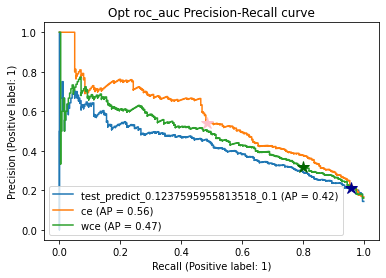

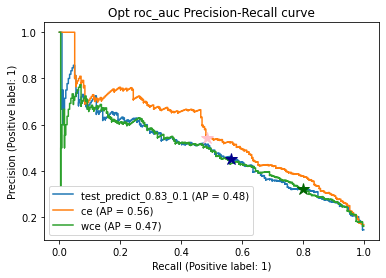

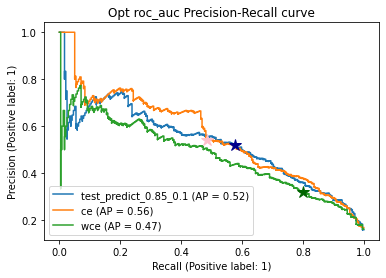

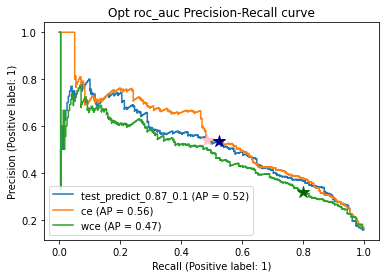

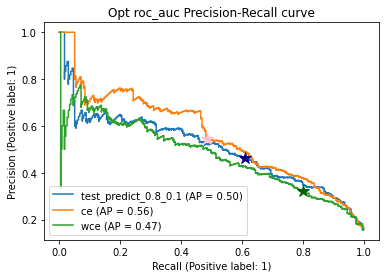

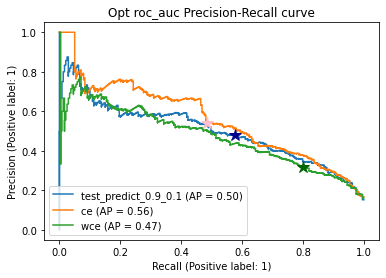

In [58]:
col = exp_names

rnid = 'lamda_gama_fix_gama_04'

for c in col:
       models_name = c
       metric = 'val_f1_score'

       pred_df = get_predicts_table(metric,rnid,scale=True)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']].fillna(0)

       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name=c,ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)

       plt.show()

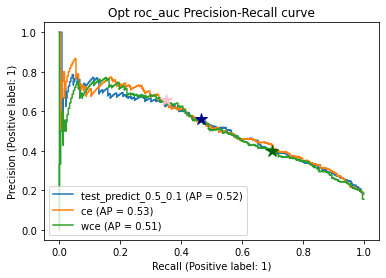

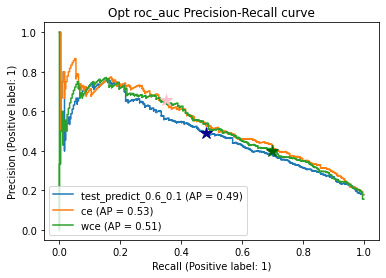

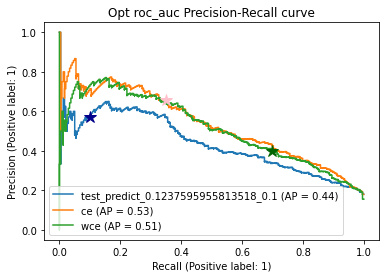

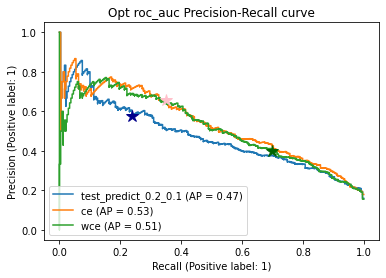

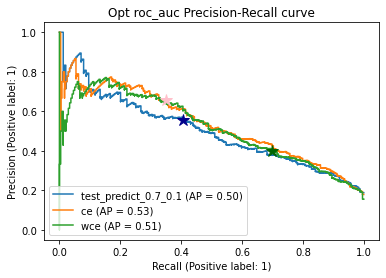

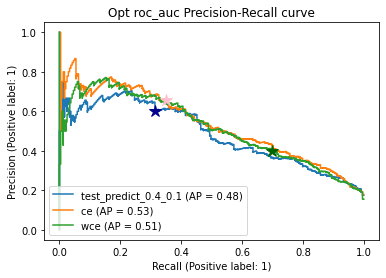

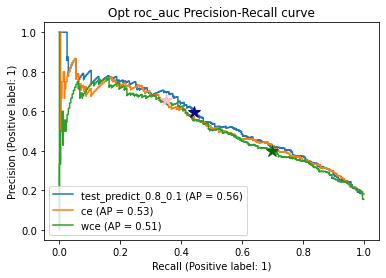

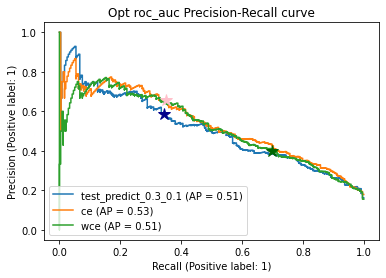

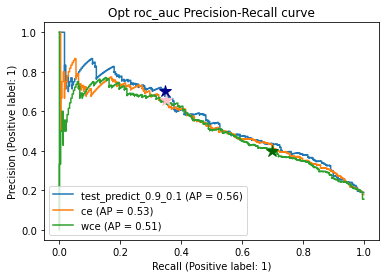

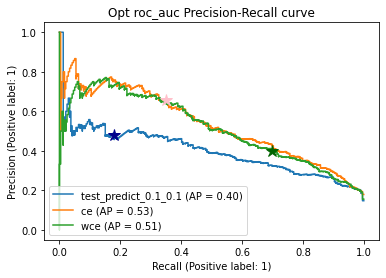

In [34]:
col = ['test_predict_0.5_0.1',
 'test_predict_0.6_0.1',
 'test_predict_0.1237595955813518_0.1',
 'test_predict_0.2_0.1',
 'test_predict_0.7_0.1',
 'test_predict_0.4_0.1',
 'test_predict_0.8_0.1',
 'test_predict_0.3_0.1',
 'test_predict_0.9_0.1',
 'test_predict_0.1_0.1']

rnid = 'lamda_gama_fix_gama'

for c in col:
       models_name = c
       metric = 'val_loss'

       pred_df = get_predicts_table(metric,rnid)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']].fillna(0)

       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name=c,ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
       _ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)
       plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)

       plt.show()

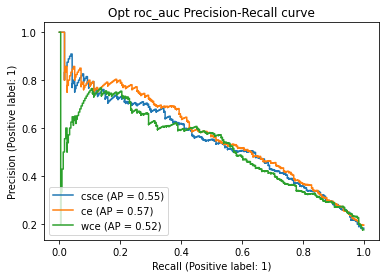

In [35]:

models_name = 'test_predict_0.9_0.1'
metric = 'val_roc_auc_score'
rnid = 'lamda_gama'

pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]

display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name="csce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
_ = display.ax_.set_title("Opt roc_auc Precision-Recall curve")


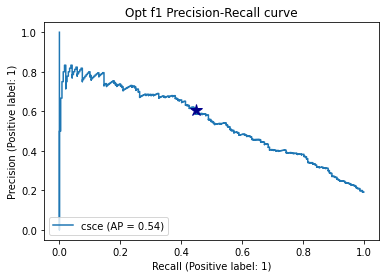

In [44]:

models_name = 'test_predict_0.9_0.1'
metric = 'val_loss'
rnid = 'lamda_gama_fix_gama_02'
pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]

display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name="csce",ax = plt.gca())
_ = display.ax_.set_title("Opt f1 Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
_ = display.ax_.set_title("Opt f1 Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
_ = display.ax_.set_title("Opt f1 Precision-Recall curve")
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)


In [48]:
import itertools
exp_range = list(np.linspace(0.1,0.9,9).round(2))
exp_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

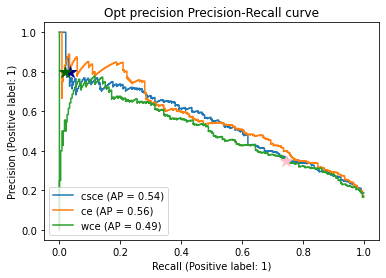

In [46]:

models_name = 'test_predict_0.9_0.1'
metric = 'val_precision_score'

pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]

display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[[models_name]], name="csce",ax = plt.gca())
_ = display.ax_.set_title("Opt precision Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_ce']], name="ce",ax = plt.gca())
_ = display.ax_.set_title("Opt precision Precision-Recall curve")
display = metrics.PrecisionRecallDisplay.from_predictions(pred_df.test_y_true, pred_df[['test_predict_wce']], name="wce",ax = plt.gca())
_ = display.ax_.set_title("Opt precision Precision-Recall curve")

plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[[models_name]] > 0.5,zero_division=1 ),c='darkblue', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5,zero_division=1 ),c='pink', marker="*",markersize=12)
plt.plot(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),metrics.precision_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5,zero_division=1 ),c='darkgreen', marker="*",markersize=12)


In [8]:
models_name = 'test_predict_0.9_0.1'
metric = 'val_f1_score'

pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]
met = metrics.precision_score
for th in exp_range:
    plt.scatter(np.sum(pred_df[[models_name]] > th),met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green')
    plt.scatter(np.sum(pred_df[['test_predict_ce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
    plt.scatter(np.sum(pred_df[['test_predict_wce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')

plt.scatter(np.sum(pred_df[[models_name]] > th),met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green',label='csce')
plt.scatter(np.sum(pred_df[['test_predict_ce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue',label='ce')
plt.scatter(np.sum(pred_df[['test_predict_wce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red',label='wce')    

plt.legend()
plt.title('Opt F1 total 1 vs precision ')
plt.xlabel('total 1 return')
plt.xlabel('precision_score')

plt.show()

NameError: name 'get_predicts_table' is not defined

In [9]:
models_name = 'test_predict_0.9_0.1'
metric = 'val_roc_auc_score'

pred_df = get_predicts_table(metric,rnid)
pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]
met = metrics.precision_score
for th in exp_range:
    plt.scatter(np.sum(pred_df[[models_name]] > th),met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green')
    plt.scatter(np.sum(pred_df[['test_predict_ce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
    plt.scatter(np.sum(pred_df[['test_predict_wce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')

plt.scatter(np.sum(pred_df[[models_name]] > th),met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green',label='csce')
plt.scatter(np.sum(pred_df[['test_predict_ce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue',label='ce')
plt.scatter(np.sum(pred_df[['test_predict_wce']] > th),met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red',label='wce')    

plt.legend()
plt.title('Opt F1 total 1 vs precision ')
plt.xlabel('total 1 return')
plt.xlabel('precision_score')

plt.show()

NameError: name 'get_predicts_table' is not defined

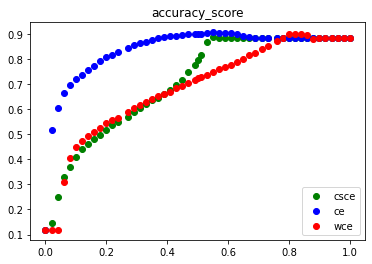

In [14]:
met = metrics.accuracy_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('accuracy_score')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


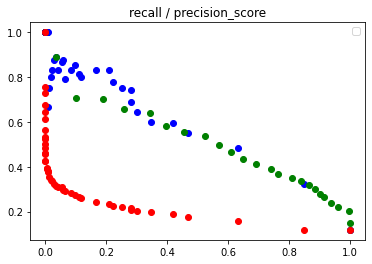

In [23]:
#recall precision 

# met = metrics.recall_score
# for th in exp_range:
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th),c='green')
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
# plt.legend()
# plt.title('recall_score')

# plt.show()


met = metrics.precision_score
for th in exp_range:
    plt.scatter(metrics.recall_score(pred_df.test_y_true,pred_df[[models_name]] > th),met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green')
    plt.scatter(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
    plt.scatter(metrics.recall_score(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')
    
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('recall / precision_score')
plt.show()

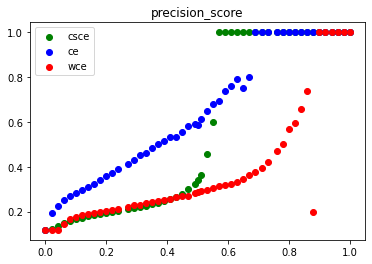

In [15]:
met = metrics.precision_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('precision_score')

plt.show()

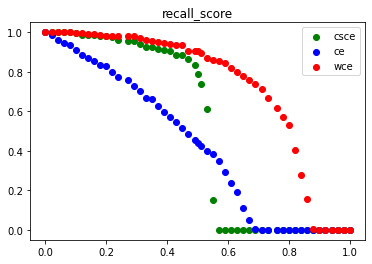

In [16]:
met = metrics.recall_score
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('recall_score')

plt.show()

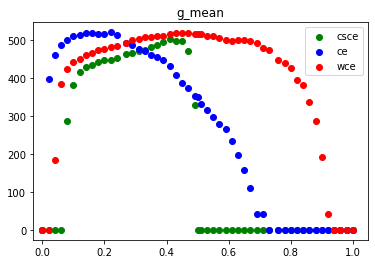

In [62]:
def g_mean(y_tru,y_pred):
    conf_met = metrics.confusion_matrix(y_tru,y_pred)
    tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0]   
    return np.sqrt(tp*tn)


met = g_mean
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('g_mean')

plt.show()

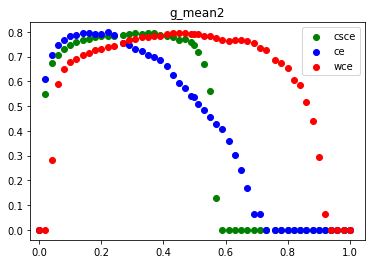

In [20]:
def g_mean2(y_tru,y_pred):
    conf_met = metrics.confusion_matrix(y_tru,y_pred)
    tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0] 
    
    SE = tp/(tp+fn)
    SP = tn/(tn+fp)  
    return np.sqrt(SE*SP)


met = g_mean2
for th in exp_range:
    plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th),c='green')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
    plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
plt.legend()
plt.title('g_mean2')

plt.show()

In [40]:



np.sum(pd.Series(pred_df[models_name] > th)[pred_df.test_y_true==1] == pred_df.test_y_true[pred_df.test_y_true==1] )

148

In [44]:
models_name

'test_predict_0.63_0.1'

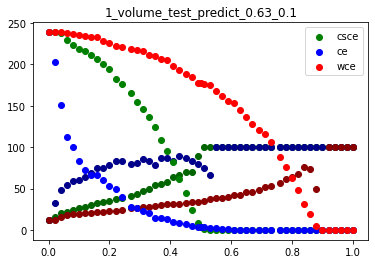

In [21]:
col = ['test_predict_0.37_0.9', 'test_predict_0.9_0.63',
       'test_predict_0.63_0.1', 'test_predict_0.63_0.37',
       'test_predict_0.1_0.9',
       'test_predict_0.1_0.63', 'test_predict_0.9_0.37',
       'test_predict_0.1_0.37', 'test_predict_0.37_0.37',
       'test_predict_0.63_0.63', 'test_predict_0.37_0.63',
       'test_predict_0.9_0.1', 'test_predict_0.37_0.1', 'test_predict_0.1_0.1']

col = ['test_predict_0.63_0.1']

met = metrics.precision_score
# for th in exp_range:
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='green',)
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='blue')
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='red')
    
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[[models_name]] > 0.5),c='green',label='csce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
# plt.legend()
# plt.title('precision_score')

# plt.show()


for models_name in col:
       pred_df = get_predicts_table('val_precision_score',rnid)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]




       def get_1_volume(true,pred,df,th):
              return np.sum(pd.Series(df[pred] > th)[df[true]==1] == df[true][df[true]==1])
       
       for th in exp_range:
              plt.scatter(th,100*met(pred_df.test_y_true,pred_df[[models_name]] > th,zero_division=1 ),c='darkgreen',)
              plt.scatter(th,100*met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th ,zero_division =1 ),c='darkblue')
              plt.scatter(th,100*met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ,zero_division =1),c='darkred')
              plt.scatter(th,metric.recall('test_y_true',models_name,pred_df,th),c='green')
              plt.scatter(th,get_1_volume('test_y_true','test_predict_ce',pred_df,th),c='blue')
              plt.scatter(th,get_1_volume('test_y_true','test_predict_wce',pred_df,th),c='red')

       
       
       plt.scatter(0.5,get_1_volume('test_y_true',models_name,pred_df,0.5),c='green',label='csce')
       plt.scatter(0.5,get_1_volume('test_y_true','test_predict_ce',pred_df,0.5),c='blue',label='ce')
       plt.scatter(0.5,get_1_volume('test_y_true','test_predict_wce',pred_df,0.5),c='red',label='wce')   

       plt.legend()
       plt.title(f'1_volume_{models_name}')
       plt.show()

plt.show()

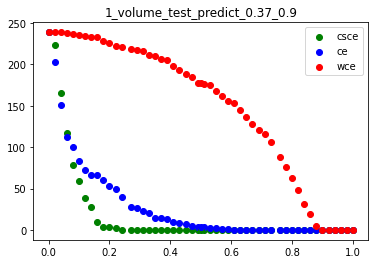

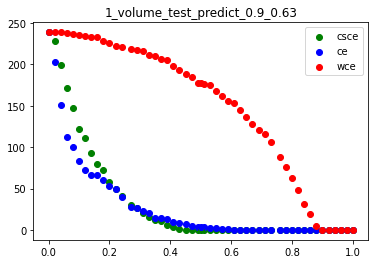

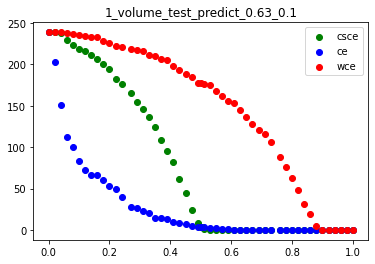

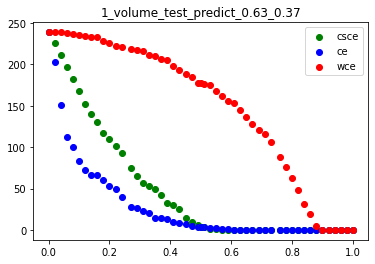

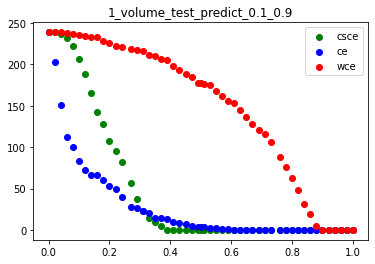

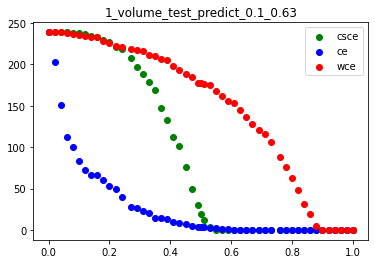

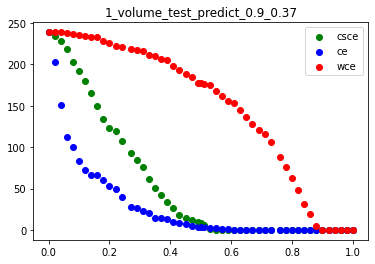

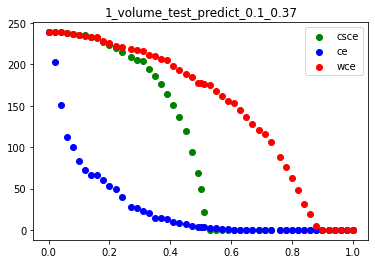

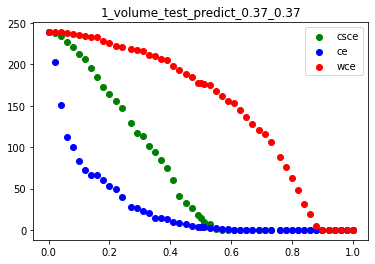

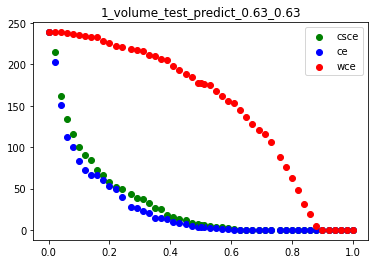

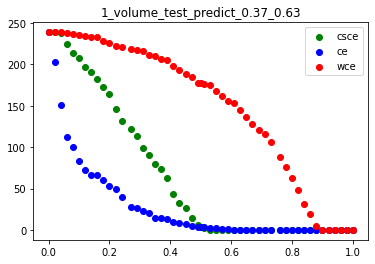

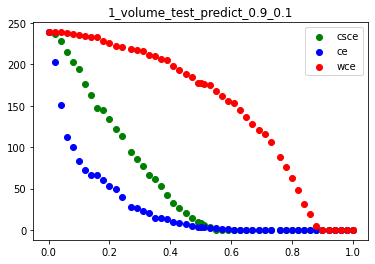

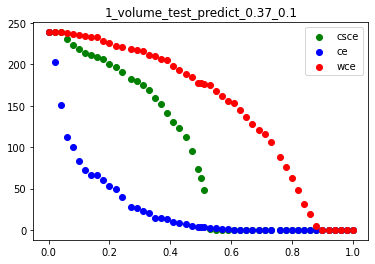

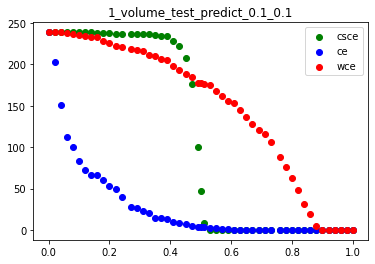

In [57]:
col = ['test_predict_0.37_0.9', 'test_predict_0.9_0.63',
       'test_predict_0.63_0.1', 'test_predict_0.63_0.37',
       'test_predict_0.1_0.9',
       'test_predict_0.1_0.63', 'test_predict_0.9_0.37',
       'test_predict_0.1_0.37', 'test_predict_0.37_0.37',
       'test_predict_0.63_0.63', 'test_predict_0.37_0.63',
       'test_predict_0.9_0.1', 'test_predict_0.37_0.1', 'test_predict_0.1_0.1']

for models_name in col:
       pred_df = get_predicts_table('val_f1_score',rnid)
       pred_df = pred_df[[models_name,'test_predict_ce','test_predict_wce','test_y_true']]




       def get_1_volume(true,pred,df,th):
              return np.sum(pd.Series(df[pred] > th)[df[true]==1] == df[true][df[true]==1])
       
       for th in exp_range:
              plt.scatter(th,get_1_volume('test_y_true',models_name,pred_df,th),c='green')
              plt.scatter(th,get_1_volume('test_y_true','test_predict_ce',pred_df,th),c='blue')
              plt.scatter(th,get_1_volume('test_y_true','test_predict_wce',pred_df,th),c='red')

       
       
       plt.scatter(0.5,get_1_volume('test_y_true',models_name,pred_df,0.5),c='green',label='csce')
       plt.scatter(0.5,get_1_volume('test_y_true','test_predict_ce',pred_df,0.5),c='blue',label='ce')
       plt.scatter(0.5,get_1_volume('test_y_true','test_predict_wce',pred_df,0.5),c='red',label='wce')   

       plt.legend()
       plt.title(f'1_volume_{models_name}')
       plt.show()

plt.show()

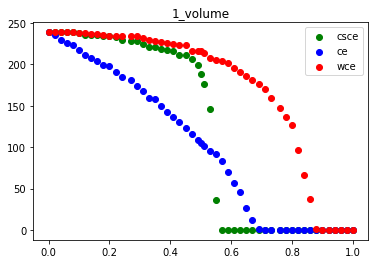

In [17]:
def get_1_volume(true,pred,df,th):
    return np.sum(pd.Series(df[pred] > th)[df[true]==1] == df[true][df[true]==1])
    
for th in exp_range:
    plt.scatter(th,get_1_volume('test_y_true',models_name,pred_df,th),c='green')
    plt.scatter(th,get_1_volume('test_y_true','test_predict_ce',pred_df,th),c='blue')
    plt.scatter(th,get_1_volume('test_y_true','test_predict_wce',pred_df,th),c='red')

 
 
plt.scatter(0.5,get_1_volume('test_y_true',models_name,pred_df,0.5),c='green',label='csce')
plt.scatter(0.5,get_1_volume('test_y_true','test_predict_ce',pred_df,0.5),c='blue',label='ce')
plt.scatter(0.5,get_1_volume('test_y_true','test_predict_wce',pred_df,0.5),c='red',label='wce')   

plt.legend()
plt.title('1_volume')

plt.show()

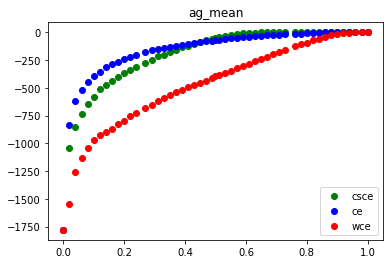

In [81]:
# def ag_mean(y_tru,y_pred):
#     conf_met = metrics.confusion_matrix(y_tru,y_pred)
#     tp,tn,fp,fn = conf_met[1,1],conf_met[0,0],conf_met[0,1],conf_met[1,0] 
    
#     SE = tp/(tp+fn)
#     SP = tn/(tn+fp)  
#     return np.sqrt(SE*SP) - (1-SP)*(tn+fp)


# met = ag_mean
# for th in exp_range:
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > th),c='green')
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > th  ),c='blue')
#     plt.scatter(th,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > th ),c='red')
    
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_0.36']] > 0.5),c='green',label='csce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_ce']] > 0.5  ),c='blue',label='ce')
# plt.scatter(0.5,met(pred_df.test_y_true,pred_df[['test_predict_wce']] > 0.5 ),c='red',label='wce')
# plt.legend()
# plt.title('ag_mean')

# plt.show()

In [97]:
from pathlib import Path

curr_exp_path = Path("results",'test', str(run_id))
curr_exp_path


PosixPath('results/test/1')

In [40]:
python train_matan_model.py --research_type csce_2 --n_epochs 20 --n_procs 1 --batch_size 32 --device_id 0 --optim SGD --data_path ../datasets/DermMel/ --model_architecture vgg19 --lamda 0.4 --gama 0.1 --is_mock 0 --momentum 0.9 --patience 5 --min_delta 1.0 --sch_gamma 1.0 --sch_step_size 5 --weight_decay 5.0e-2 --lr 1.0e-3 --opt_metric val_loss --run_id test 

36

In [4]:
import numpy as np
import os 
import time
import itertools
start_time = time.time()
exp_range = list(np.linspace(0.1,0.9,4).round(2))
exp_range_2 = list(itertools.product(exp_range, exp_range))
len(exp_range_2)

16

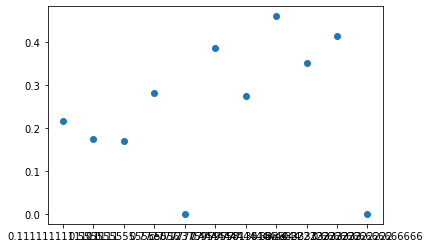

In [29]:
test_Data = results_df[results_df.phase=='test']

plt.scatter(test_Data.lamda,test_Data._f1_score)a